In [9]:
## Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

DATASETS_DIR = 'datasets'

In [29]:
## Função auxiliar
def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.txt'), sep='\t', index_col = 0)
    return dataset

In [30]:
## Entrada de dados
maxiter = 1
k = 5
nome_arquivo = 'c2ds1-2sp'

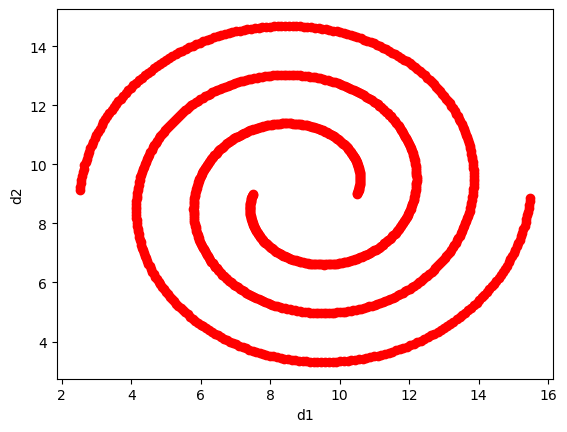

In [31]:
## Plot dos dados de entrada
dados = load_dataset(nome_arquivo)
X = dados[['d1', 'd2']]
plt.scatter(X["d1"],X["d2"], c="red")
plt.xlabel("d1")
plt.ylabel("d2")
plt.show()

In [32]:
## Iniciar centróides
def initiate_centroids(k,dset):
    centroides = dset.sample(k)
    return centroides

np.random.seed(86)
centroids = initiate_centroids(k,X)

In [33]:
## Função de distância
def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 

In [34]:
## Atribuição de das amostras aos centróides
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors


In [35]:
## Função do K-médias
def kmeans(dset, k, maxiter):
    working_dset = dset.copy()
    err = []
    
    centroids = initiate_centroids(k, dset)

    for i in range(maxiter):
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [36]:
## Execução do K-médias
np.random.seed(86)
X['centroid'], X['error'], centroids =  kmeans(X[['d1','d2']], k, maxiter)

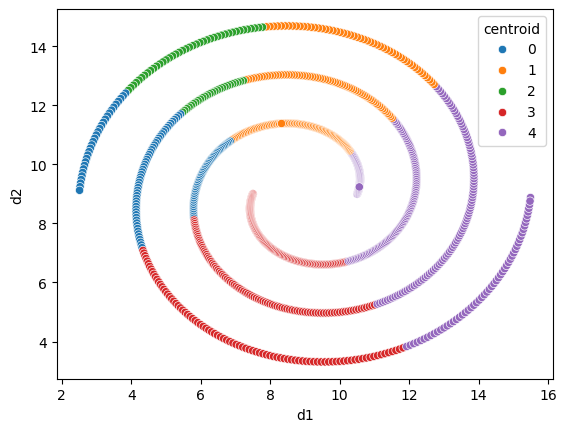

In [37]:
## Plotar após k-médias
df = pd.DataFrame(X)
df.columns = ['d1','d2', 'centroid', 'error']
cores = sns.color_palette()[0:k]
sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["centroid"], palette=cores)
plt.show()

In [40]:
## Exportar arquivo
select_ = ['sample_label', 'centroid']
select = [x for x in df.columns if x in select_]
export = df[select]
export.to_csv(nome_arquivo + '.csv')